# BMIS-2542: Data Programming with Python 
##### Katz Graduate School of Business, Fall 2019


### Session-7: Exploratory Analysis - II - Solutions
***

The [United States Social Security Administration (SSA)](https://www.ssa.gov/oact/babynames/limits.html) has made available data on the frequency of baby names from 1880 through the present. The archive of these data files `names.zip` can be downloaded from CourseWeb. When you unzip these data, you will have a directory containing a series of files like `yob1880.txt`. Analyze this data to answer the following questions.

Here is a list of [HTML Color Names](https://www.w3schools.com/colors/colors_names.asp), if you like to experiment with colors.

**Q1.** Report the total births in 2018 by gender.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load yob2018.txt into a DataFrame
df2018 = pd.read_csv('names\yob2018.txt', header = None, names = ['name', 'gender', 'births'])
df2018.head()

,name,gender,births
0,Emma,F,18688
1,Olivia,F,17921
2,Ava,F,14924
3,Isabella,F,14464
4,Sophia,F,13928


In [3]:
# Group by gender and compute the sum
groupByGender2018 = df2018.groupby('gender')[['births']].sum()
groupByGender2018

,births
gender,
F,1686961
M,1800392


 **Q2.** Show the results obtained for Q1 in a pie chart. 
  - Use the color codes `hotpink` for girls and `deepskyblue` for boys
  - Set the lables to `Male` and `Female`
  - Show the percentages
  - Set the chart title to `2018 Births by Gender`

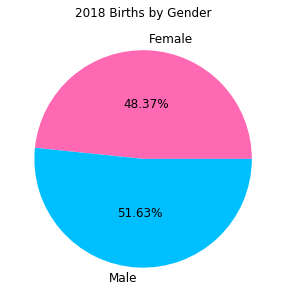

In [4]:
plt.figure()
groupByGender2018.births.plot.pie(labels=['Female', 'Male'], colors=['hotpink', 'deepskyblue'],
                 autopct='%.2f%%', pctdistance=0.5, fontsize=12, figsize=(5, 5));
plt.title('2018 Births by Gender')
plt.axis('off');

In [5]:
plt.close('All')

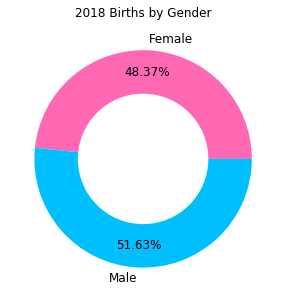

In [6]:
# we can make the above pie chart to a donut by drawing a circle at the center of the pie chart

plt.figure()
groupByGender2018.births.plot.pie(labels=['Female', 'Male'], colors=['hotpink', 'deepskyblue'],
                 autopct='%.2f%%', pctdistance=0.8, fontsize=12, figsize=(5, 5));
plt.title('2018 Births by Gender')
plt.axis('off');

# draw circle
centre_circle = plt.Circle((0,0),0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);

**Q3.** Since the dataset is split into files by year, an important first thing to do is to assemble all of the data into a single `DataFrame`. <br>Create this `DataFrame` and add a `year` field to it. (Hint. Use `pandas.concat`).

In [5]:
years = range(1880, 2019)
columns = ['name', 'gender', 'births']
dataFrames = []
rowCount = 0

for year in years:
    path = 'names\yob{0}.txt'.format(year)
    df = pd.read_csv(path, header = None, names = columns)
    df['year'] = year
    rowCount = rowCount + len(df)
    dataFrames.append(df)
print(len(dataFrames),'DataFrames',rowCount, 'Total Records')

139 DataFrames 1957046 Total Records


In [6]:
# concatenate  everything into a single DataFrame
dfNames = pd.concat(dataFrames, ignore_index= True)
dfNames.shape

(1957046, 4)

In [9]:
dfNames.tail()

,name,gender,births,year
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018
1957045,Zzyzx,M,5,2018


**Q4.** Report the total number of births for each year by gender. (Hint. Use a pivot table)

In [7]:
births_by_year_gender = pd.pivot_table(dfNames, values='births', index = 'year', columns = 'gender', aggfunc='sum')
births_by_year_gender

gender,F,M
year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442
1885,133055,107799
1886,144533,110785
1887,145981,101412
1888,178622,120851


**Q5.** Use the pivot table obtained in Q4 above to create a line plot that shows the variation of the total births over the years by gender. (`x` axis:`year`, `y` axis: total number of births).
 - Set the title to `Total Births by Gender and Year`
 - Set the line color for female births `hotpink` and male births `deepskyblue`
 - Set the y axis label to `Total Births` and x axis label to `Year`
 - Display the tick labels on the x axis for every 10 years (i.e., 1880, 1890, 1900,....)

<Figure size 432x288 with 0 Axes>

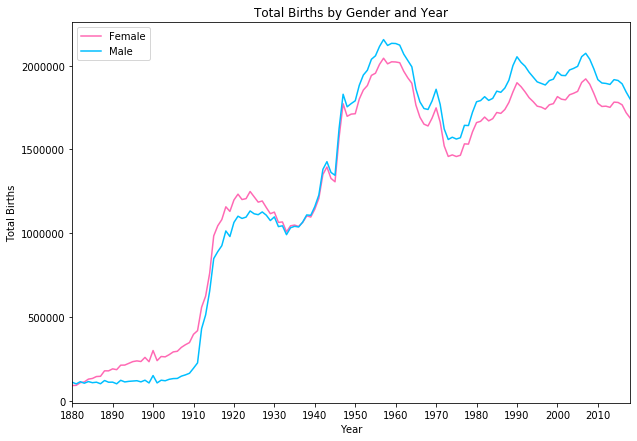

In [8]:
plt.close('all');
plt.figure();
births_by_year_gender.plot(title = 'Total Births by Gender and Year', color= ['hotpink', 'deepskyblue'], figsize=(10,7))
plt.ylabel('Total Births')
plt.xlabel('Year')
plt.xticks(range(1880, 2020, 10));
plt.legend(['Female', 'Male']);

**Q6.** Create the new column `prop` with the fraction of babies given each name relative to the total number of births in that year for that gender.<br> For example, a `prop` value of `0.02` for the name `Bill` for the year `2000` would indicate that 2 out of every 100 baby boys born in 2000 were given the name `Bill`.

In [12]:
def compute_prop(group):
    group['prop'] = group.births/group.births.sum()    
    return group

In [13]:
df_names = dfNames.groupby(['year','gender']).apply(compute_prop)
df_names.head()

,name,gender,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [14]:
# sanity check to verify that the sum of the `prop` column sums to 1 within all groups
df_names.groupby(['year','gender']).prop.sum()

year  gender
1880  F         1.0
      M         1.0
1881  F         1.0
      M         1.0
1882  F         1.0
      M         1.0
1883  F         1.0
      M         1.0
1884  F         1.0
      M         1.0
1885  F         1.0
      M         1.0
1886  F         1.0
      M         1.0
1887  F         1.0
      M         1.0
1888  F         1.0
      M         1.0
1889  F         1.0
      M         1.0
1890  F         1.0
      M         1.0
1891  F         1.0
      M         1.0
1892  F         1.0
      M         1.0
1893  F         1.0
      M         1.0
1894  F         1.0
      M         1.0
               ... 
2004  F         1.0
      M         1.0
2005  F         1.0
      M         1.0
2006  F         1.0
      M         1.0
2007  F         1.0
      M         1.0
2008  F         1.0
      M         1.0
2009  F         1.0
      M         1.0
2010  F         1.0
      M         1.0
2011  F         1.0
      M         1.0
2012  F         1.0
      M         1.0
2013  F

**Q7.** Extract a subset of data (e.g., `top1000`), with the top 1000 names for each `year-gender` combination.

In [15]:
def get_top1000(group):
    return group.sort_values(by = 'births', ascending = False)[:1000]

In [16]:
top1000 = df_names.groupby(['year', 'gender']).apply(get_top1000)
top1000

name gender  births  year      prop
year gender                                                  
1880 F      0             Mary      F    7065  1880  0.077642
            1             Anna      F    2604  1880  0.028617
            2             Emma      F    2003  1880  0.022012
            3        Elizabeth      F    1939  1880  0.021309
            4           Minnie      F    1746  1880  0.019188
            5         Margaret      F    1578  1880  0.017342
            6              Ida      F    1472  1880  0.016177
            7            Alice      F    1414  1880  0.015539
            8           Bertha      F    1320  1880  0.014506
            9            Sarah      F    1288  1880  0.014155
            10           Annie      F    1258  1880  0.013825
            11           Clara      F    1226  1880  0.013473
            12            Ella      F    1156  1880  0.012704
            13        Florence      F    1063  1880  0.011682
            14            Cora      F    1045  1880  0.011484
            15          Martha      F    1040  1880  0.011429
            16           Laura      F    1012  1880  0.011122
            17          Nellie      F     995  1880  0.010935
            18           Grace      F     982  1880  0.010792
            19          Carrie      F     949  1880  0.010429
            20           Maude      F     859  1880  0.009440
            21           Mabel      F     808  1880  0.008880
            22          Bessie      F     796  1880  0.008748
            23          Jennie      F     793  1880  0.008715
            24        Gertrude      F     787  1880  0.008649
            25           Julia      F     783  1880  0.008605
            26          Hattie      F     769  1880  0.008451
            27           Edith      F     768  1880  0.008440
            28          Mattie      F     704  1880  0.007737
            29            Rose      F     700  1880  0.007693
...                        ...    ...     ...   ...       ...
2018 M      1944012     Harper      M     212  2018  0.000118
            1944013     Justus      M     212  2018  0.000118
            1944016        Zev      M     211  2018  0.000117
            1944015     Gibson      M     211  2018  0.000117
            1944014     Forest      M     211  2018  0.000117
            1944020     Jesiah      M     210  2018  0.000117
            1944021      Torin      M     210  2018  0.000117
            1944017     Alaric      M     210  2018  0.000117
            1944019     Ernest      M     210  2018  0.000117
            1944018     Decker      M     210  2018  0.000117
            1944022   Benedict      M     209  2018  0.000116
            1944024   Deangelo      M     209  2018  0.000116
            1944025    Genesis      M     209  2018  0.000116
            1944026     Harlem      M     209  2018  0.000116
            1944027      Kalel      M     209  2018  0.000116
            1944028      Kylen      M     209  2018  0.000116
            1944023      Bowie      M     209  2018  0.000116
            1944030   Immanuel      M     208  2018  0.000116
            1944032     Zavier      M     208  2018  0.000116
            1944029     Bishop      M     208  2018  0.000116
            1944031       Lian      M     208  2018  0.000116
            1944033     Archie      M     207  2018  0.000115
            1944034     Davian      M     207  2018  0.000115
            1944035        Gus      M     207  2018  0.000115
            1944036      Kabir      M     207  2018  0.000115
            1944037     Korbyn      M     207  2018  0.000115
            1944038    Randall      M     207  2018  0.000115
            1944039     Benton      M     206  2018  0.000114
            1944040    Coleman      M     206  2018  0.000114
            1944041     Markus      M     206  2018  0.000114

[277877 rows x 5 columns]

In [17]:
# drop the hierarchical indexing and convert into a DataFrame
top1000.reset_index(inplace = True, drop = True)
top1000

,name,gender,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015539
8,Bertha,F,1320,1880,0.014506
9,Sarah,F,1288,1880,0.014155


In [18]:
# check if top 1000 for each year and gender are extracted correctly
top1000.groupby(['year', 'gender'])['births'].count()

year  gender
1880  F          942
      M         1000
1881  F          938
      M          997
1882  F         1000
      M         1000
1883  F         1000
      M         1000
1884  F         1000
      M         1000
1885  F         1000
      M         1000
1886  F         1000
      M         1000
1887  F         1000
      M         1000
1888  F         1000
      M         1000
1889  F         1000
      M         1000
1890  F         1000
      M         1000
1891  F         1000
      M         1000
1892  F         1000
      M         1000
1893  F         1000
      M         1000
1894  F         1000
      M         1000
                ... 
2004  F         1000
      M         1000
2005  F         1000
      M         1000
2006  F         1000
      M         1000
2007  F         1000
      M         1000
2008  F         1000
      M         1000
2009  F         1000
      M         1000
2010  F         1000
      M         1000
2011  F         1000
      M         1000


**Q8.** Analyze the naming trends for the names: `John, Harry, Mary, Marilyn` by plotting the number of births for each name over the years.
 - Create a pivot table to report the total number of births by year and name
 - Use the pvot table to create a chart with one subplot per each name (Hint. in plot(), set `subplots=True` in `pandas.plot()`)
 - Examine whether these names have grown out of favor with the American population.

In [19]:
name_trends = pd.pivot_table(data = df_names[df_names.name.isin(['John', 'Harry', 'Mary', 'Marilyn'])], index = 'year', columns = 'name', values = 'births', aggfunc = sum, fill_value = 0)
name_trends

name,Harry,John,Marilyn,Mary
year,,,,
1880,2158,9701,0,7092
1881,2002,8795,0,6948
1882,2246,9597,0,8178
1883,2116,8934,0,8044
1884,2338,9428,0,9253
1885,2209,8801,0,9166
1886,2272,9074,0,9921
1887,2070,8166,0,9935
1888,2772,9299,0,11804


<Figure size 432x288 with 0 Axes>

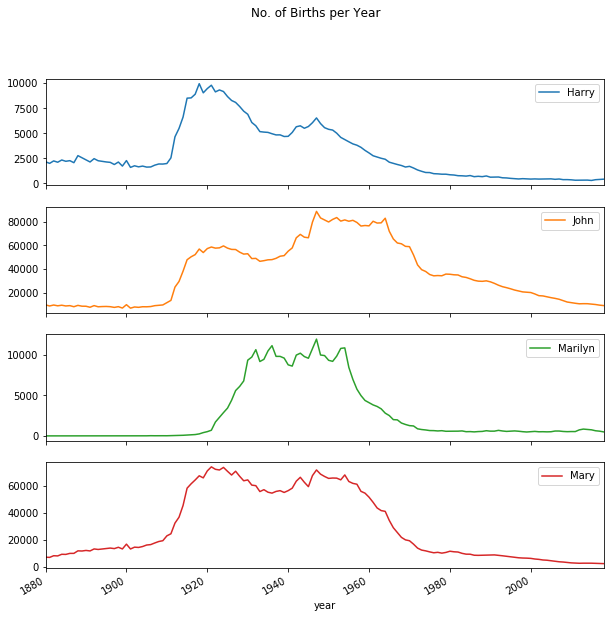

In [20]:
plt.close('all')
plt.figure();
name_trends.plot(subplots = True, figsize= (10,10), title='No. of Births per Year');

**Q9.** One explanation for the decreasing trend is that fewer parents are choosing common names for their children.<br>
Explore this hypothesis by examining the proportion of births for each gender amongst the top 1,000 most popular names. 
- Create a pivot table to report the proportion of births by year and gender within the top 1000 names for that year and gender (i.e., use the top 1000 names subset created above)
- Plot the proportion of births in the top 1000 names over the years for each gender 

In [21]:
name_trends_prop = pd.pivot_table(data = top1000, index = 'year', columns='gender', values='prop', fill_value = 0, aggfunc=sum)
name_trends_prop

gender,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
1885,0.992251,0.995501
1886,0.989504,0.995035
1887,0.988279,0.996697
1888,0.984240,0.992429


In [22]:
plt.close('all');
plt.figure();

<Figure size 432x288 with 0 Axes>

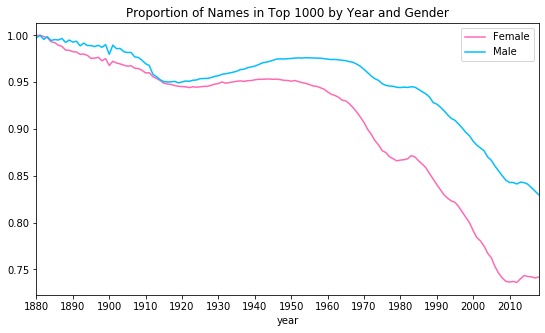

In [23]:
name_trends_prop.plot(title='Proportion of Names in Top 1000 by Year and Gender', xticks = range(1880, 2020, 10),  color= ['hotpink', 'deepskyblue'], figsize=(9,5));
plt.legend(['Female', 'Male']);

According to the plot, there appears to be an increasing name diversity (i.e., decreasing total proportion in the top 1,000)

**Q10.** In 2007, baby name researcher [Laura Wattenberg](http://babynamewizard.com) pointed out that the distribution of boy names by final letter has changed significantly over the last 100 years. Analyze the data to see whether this is the case.
 - Create a new column `last_letter` with the last letter of each name 
 - For years 1910, 1960, and 2010,  create a pivot table with last letter (index), total no. of births by year (columns), gender (columns). 
 - Normalize this data to obtain the proportion of total births for each gender ending in each letter
 - Plot the results in a bar chart (x: last letter, y: proportion, dodged bars to represent each year, separate bar plots for males and females)
 - Repeat the above process for the boys' names from the full dataset and plot the trends for the names ending with `d, n, y`

In [24]:
df_names['last_letter'] = df_names.name.map(lambda x:x[-1])
df_names.head(10)

,name,gender,births,year,prop,last_letter
0,Mary,F,7065,1880,0.077642,y
1,Anna,F,2604,1880,0.028617,a
2,Emma,F,2003,1880,0.022012,a
3,Elizabeth,F,1939,1880,0.021309,h
4,Minnie,F,1746,1880,0.019188,e
5,Margaret,F,1578,1880,0.017342,t
6,Ida,F,1472,1880,0.016177,a
7,Alice,F,1414,1880,0.015539,e
8,Bertha,F,1320,1880,0.014506,a
9,Sarah,F,1288,1880,0.014155,h


In [25]:
df_last_letter = df_names[df_names.year.isin([1910, 1960, 2010])].pivot_table(index = 'last_letter', columns=['gender','year'],values='births', aggfunc=sum, fill_value=0)
df_last_letter

gender            F                      M                
year           1910    1960    2010   1910    1960    2010
last_letter                                               
a            108399  691261  676865    977    5212   28868
b                 0     694     455    411    3912   39276
c                 5      49     956    482   15454   23348
d              6751    3731    2642  22113  262116   44828
e            133601  435030  316764  28665  178768  130253
f                 0      20      97    152    9230    2312
g                57     318     669    439   20230    2696
h             20432   73241  134877   8849   80840   99303
i               605   80814   56276    164    1295   43447
j                 0       0     165      0       0    1479
k                48     314     631   7104  105284   35518
l             17124   68476   46853  12628  223641  135029
m               476   17417    4610  11273   72142   47349
n             31418  264228  248655  27847  325214  694587
o               663    4932    2214   3314   27377   81580
p                 7      47      35    616   12096    2431
q                 0       0      53      0       0     345
r              5311   13680   32032  12521   66180  167498
s             15478   25810   23677  25404  218984  124871
t             10877   30734   13918  14155  139972   43812
u               271    1162     739     24     121    2354
v                 0     122     208     22      77    2777
w                 8      63    2111   1228   16433   31012
x                 6      74    1295    770    3946   16475
y             44002  308463  207305  15021  343238  111524
z               966    1330    1243     33     393    3504

In [26]:
df_last_letter.sum()

gender  year
F       1910     396505
        1960    2022010
        2010    1775345
M       1910     194212
        1960    2132155
        2010    1916476
dtype: int64

In [27]:
letter_prop = df_last_letter/df_last_letter.sum()
letter_prop

gender              F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273386  0.341868  0.381258  0.005031  0.002444  0.015063
b            0.000000  0.000343  0.000256  0.002116  0.001835  0.020494
c            0.000013  0.000024  0.000538  0.002482  0.007248  0.012183
d            0.017026  0.001845  0.001488  0.113860  0.122935  0.023391
e            0.336947  0.215147  0.178424  0.147596  0.083844  0.067965
f            0.000000  0.000010  0.000055  0.000783  0.004329  0.001206
g            0.000144  0.000157  0.000377  0.002260  0.009488  0.001407
h            0.051530  0.036222  0.075972  0.045564  0.037915  0.051815
i            0.001526  0.039967  0.031699  0.000844  0.000607  0.022670
j            0.000000  0.000000  0.000093  0.000000  0.000000  0.000772
k            0.000121  0.000155  0.000355  0.036579  0.049379  0.018533
l            0.043187  0.033865  0.026391  0.065022  0.104890  0.070457
m            0.001200  0.008614  0.002597  0.058045  0.033835  0.024706
n            0.079237  0.130676  0.140060  0.143385  0.152528  0.362429
o            0.001672  0.002439  0.001247  0.017064  0.012840  0.042568
p            0.000018  0.000023  0.000020  0.003172  0.005673  0.001268
q            0.000000  0.000000  0.000030  0.000000  0.000000  0.000180
r            0.013395  0.006766  0.018043  0.064471  0.031039  0.087399
s            0.039036  0.012765  0.013337  0.130806  0.102705  0.065157
t            0.027432  0.015200  0.007840  0.072884  0.065648  0.022861
u            0.000683  0.000575  0.000416  0.000124  0.000057  0.001228
v            0.000000  0.000060  0.000117  0.000113  0.000036  0.001449
w            0.000020  0.000031  0.001189  0.006323  0.007707  0.016182
x            0.000015  0.000037  0.000729  0.003965  0.001851  0.008597
y            0.110975  0.152553  0.116769  0.077343  0.160982  0.058192
z            0.002436  0.000658  0.000700  0.000170  0.000184  0.001828

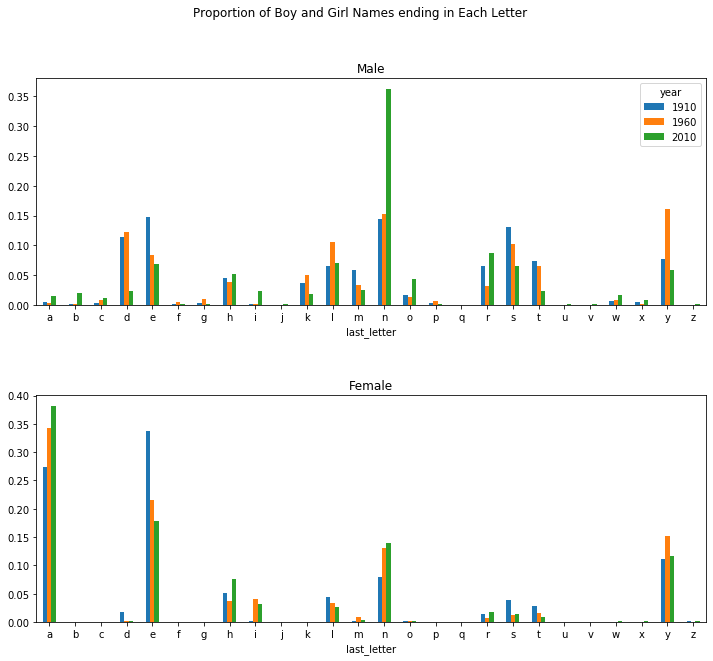

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
plt.suptitle('Proportion of Boy and Girl Names ending in Each Letter')

letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)


plt.subplots_adjust(wspace=0.3, hspace=0.4)

In [29]:
full_table_letter = df_names.pivot_table(index = 'last_letter', columns=['gender','year'],values='births', aggfunc=sum, fill_value=0)
letter_prop_d_n_y = full_table_letter / full_table_letter.sum()
dny_ts = letter_prop_d_n_y.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


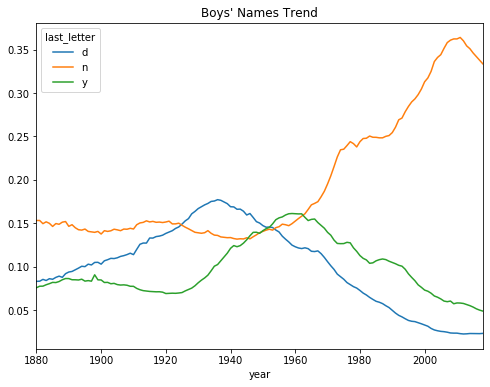

In [30]:
dny_ts.plot(title='Boys\' Names Trend', figsize=(8,6));